In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
gold = pd.read_csv('/workspaces/setproject/set1.csv')

In [7]:
gold["MA50"] = gold["Open"].rolling(window=50).mean()
gold["MA200"] = gold["Open"].rolling(window=200).mean()

In [8]:
gold["ATR"] = gold["High"] - gold["Low"]
gold["ATR"] = gold["ATR"].ewm(alpha=1/14, min_periods=14).mean()

In [9]:
gold["AroonUp"] = ((gold["High"].rolling(window=25).max() - gold["Open"]) / 25) * 100
gold["AroonDown"] = ((gold["Open"] - gold["Low"].rolling(window=25).min()) / 25) * 100

In [10]:
print(gold.tail())

          Date   Price    Open    High     Low   Vol. Change %      MA50  \
2578  1/8/2013  1663.2  1651.5  1662.6  1648.8  0.13K    0.97%  1634.948   
2579  1/7/2013  1647.2  1657.3  1663.8  1645.3  0.09K   -0.16%  1636.040   
2580  1/4/2013  1649.9  1664.4  1664.4  1630.0  0.31K   -1.53%  1637.516   
2581  1/3/2013  1675.6  1688.0  1689.3  1664.3  0.19K   -0.85%  1639.490   
2582  1/2/2013  1689.9  1675.8  1695.0  1672.1  0.06K    0.78%  1641.154   

          MA200        ATR  AroonUp  AroonDown  
2578  1444.9340  16.762483    182.4       29.6  
2579  1446.8525  16.886591    159.2       48.0  
2580  1448.7970  18.137549    130.8      137.6  
2581  1450.8050  18.627724     36.4      232.0  
2582  1452.6490  18.932887     85.2      183.2  


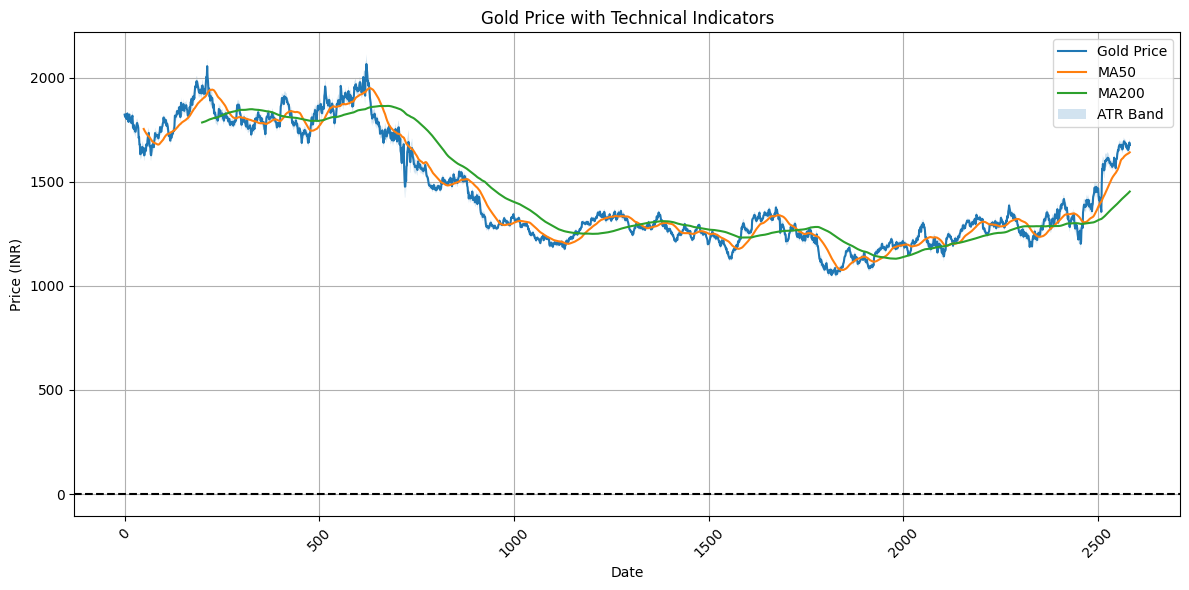

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(gold.index, gold["Open"], label="Gold Price")
plt.plot(gold.index, gold["MA50"], label="MA50")
plt.plot(gold.index, gold["MA200"], label="MA200")
plt.fill_between(gold.index, gold["Open"] - gold["ATR"], gold["Open"] + gold["ATR"], alpha=0.2, label="ATR Band")
plt.axhline(y=0, color='black', linestyle='--')  # Zero line for reference
plt.title("Gold Price with Technical Indicators")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()